In [ ]:
!pip install ucimlrepo

Veri Seti Yükleme

In [ ]:
from ucimlrepo import fetch_ucirepo
auto_mpg = fetch_ucirepo(id=9)
X = auto_mpg.data.features # X featureların yer aldığı değişken
y = auto_mpg.data.targets #y target değişkenimiz olan mpga'nın yer aldığı değişken

İlk 5 ve son 5 satıra bakıp veriyi inceliyoruz

In [ ]:
display(X.head())

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [ ]:
display(X.tail())

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1
397,119.0,4,82.0,2720,19.4,82,1


In [ ]:
display(X.describe())

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.053571,2970.424623,15.552010,76.010050,1.572864
std,104.269838,1.701004,37.304696,846.841774,2.693089,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.800000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,202.500000,5140.000000,22.200000,82.000000,3.000000


In [ ]:
#Hedef targetı inceleme
display(y.head())

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Eksik değer analizi

In [ ]:
# Eksik (NaN) veri sayısını bul
missing_counts = X.isna().sum()
print(missing_counts)

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [ ]:
print(X.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


horsepoweda 6 tane eksik değer var, ortalama ile dolduruyorum

In [ ]:
X["horsepower"] = X["horsepower"].fillna(X["horsepower"].mean())

<ipython-input-51-7b25f7ace461>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["horsepower"] = X["horsepower"].fillna(X["horsepower"].mean())


In [ ]:
import pandas as pd
# One-hot encoding
df = pd.get_dummies(X, columns=["origin"])

şimdi aykırı değerleri inceliyoruz, tüm aykırı değerleri sınıra çektim


--- displacement Sütunu ---


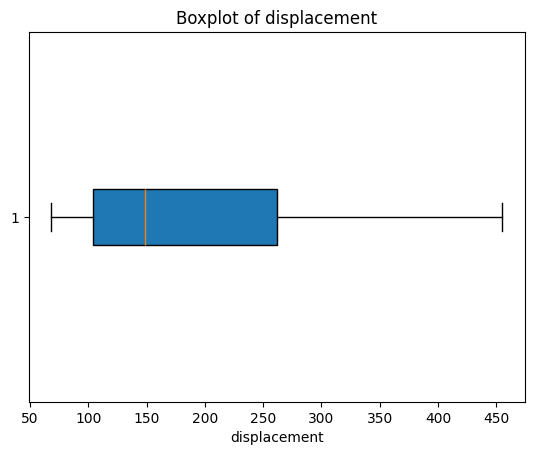

IQR: 157.75, Lower Bound: -132.375, Upper Bound: 498.625
Aykırı Değer Sayısı: 0


<ipython-input-53-3c03179bf316>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(


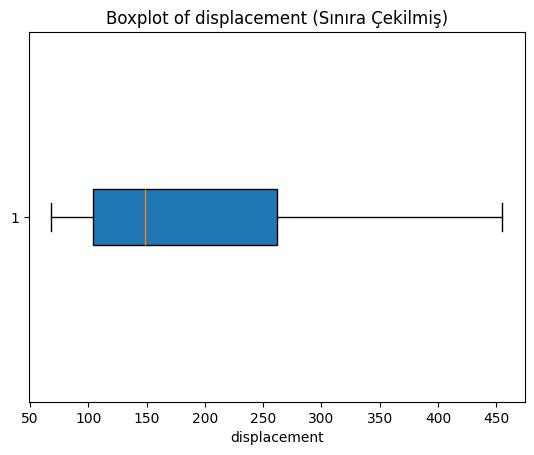


--- cylinders Sütunu ---


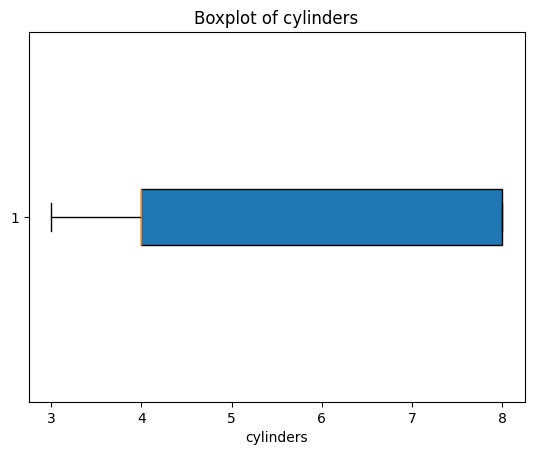

IQR: 4.0, Lower Bound: -2.0, Upper Bound: 14.0
Aykırı Değer Sayısı: 0


<ipython-input-53-3c03179bf316>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(


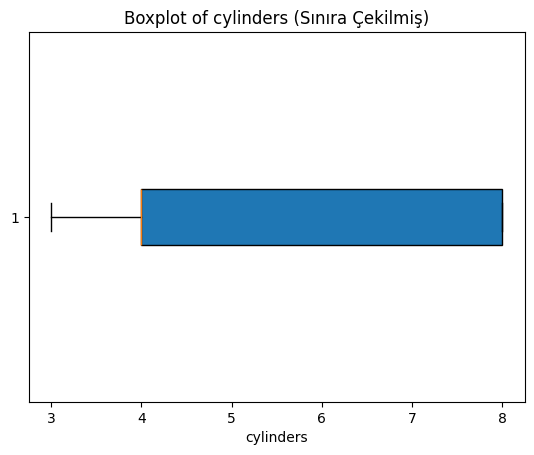


--- horsepower Sütunu ---


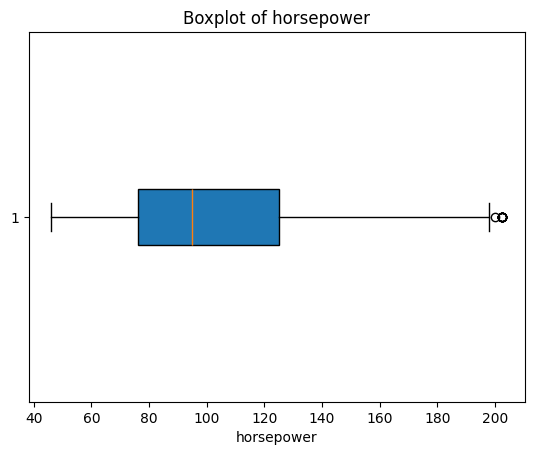

IQR: 49.0, Lower Bound: 2.5, Upper Bound: 198.5
Aykırı Değer Sayısı: 11


<ipython-input-53-3c03179bf316>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(


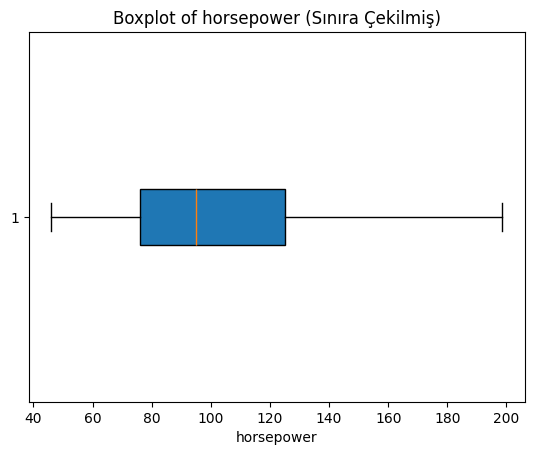


--- weight Sütunu ---


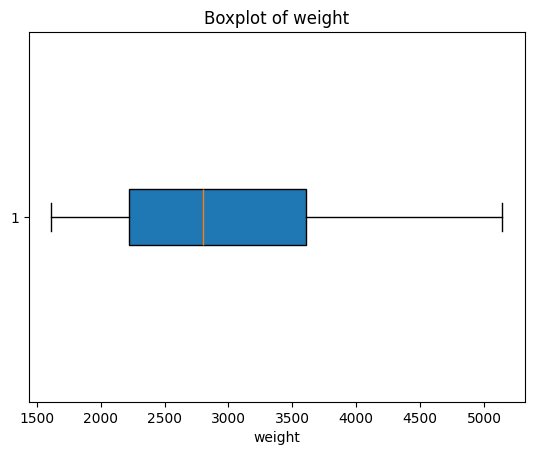

IQR: 1384.25, Lower Bound: 147.375, Upper Bound: 5684.375
Aykırı Değer Sayısı: 0


<ipython-input-53-3c03179bf316>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(


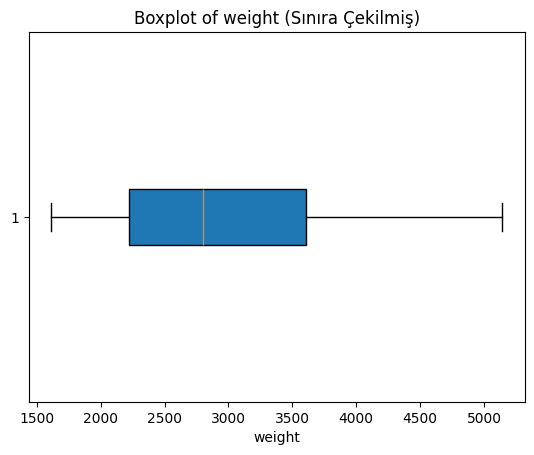


--- acceleration Sütunu ---


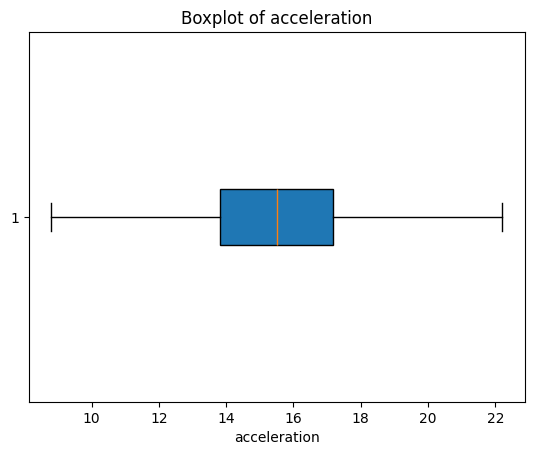

IQR: 3.3499999999999996, Lower Bound: 8.8, Upper Bound: 22.2
Aykırı Değer Sayısı: 0


<ipython-input-53-3c03179bf316>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(


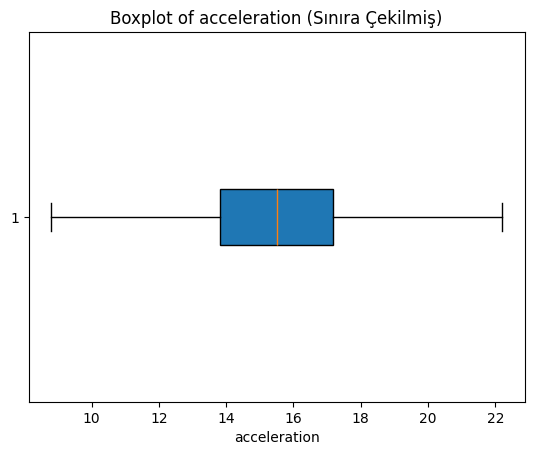


--- model_year Sütunu ---


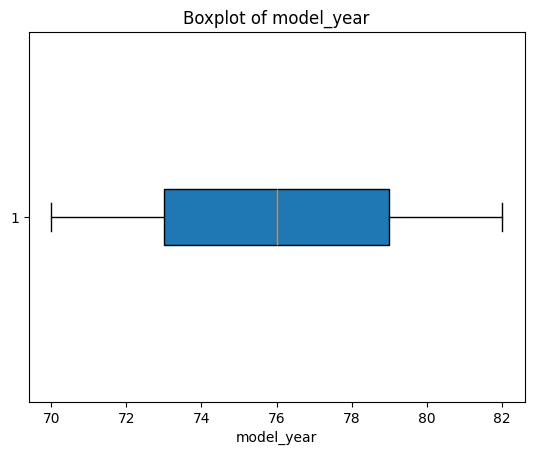

IQR: 6.0, Lower Bound: 64.0, Upper Bound: 88.0
Aykırı Değer Sayısı: 0


<ipython-input-53-3c03179bf316>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(


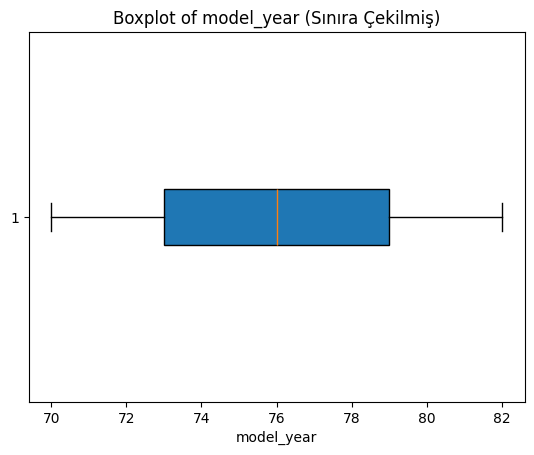


--- origin Sütunu ---


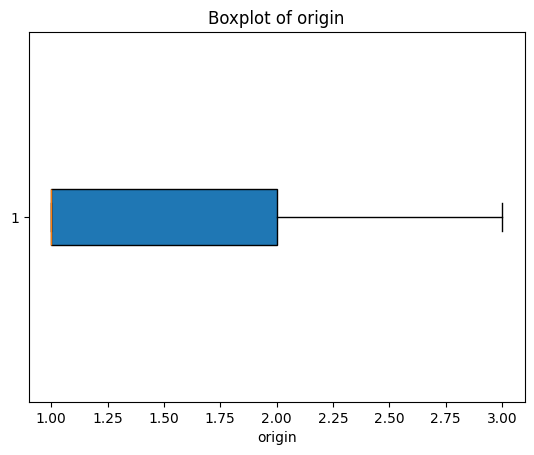

IQR: 1.0, Lower Bound: -0.5, Upper Bound: 3.5
Aykırı Değer Sayısı: 0


<ipython-input-53-3c03179bf316>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(


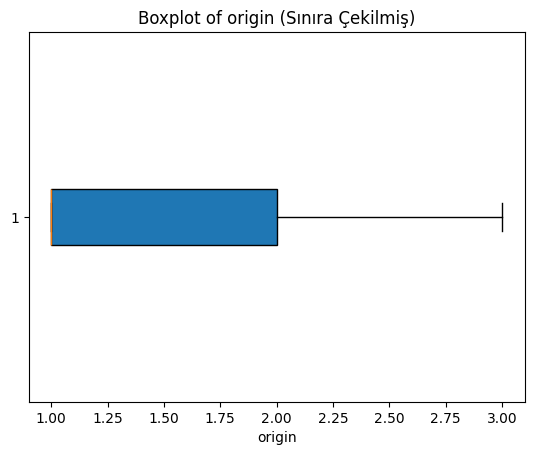

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    print(f"\n--- {col} Sütunu ---")

    # Boxplot ile aykırı değerleri görselleştir
    plt.boxplot(X[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # IQR yöntemi ile aykırı değer analizi
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    print(f"Aykırı Değer Sayısı: {len(outliers)}")

    # Aykırı değerleri sınıra çek
    X[col] = X[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Sınıra çekilmiş veriyi tekrar görselleştir
    plt.boxplot(X[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Sınıra Çekilmiş)")
    plt.xlabel(col)
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = X.copy()  # Orijinal veriyi korumak için kopya oluştur
X_normalized[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

print(X_normalized.head())  # İlk 5 satırı göster


   displacement  cylinders  horsepower    weight  acceleration  model_year  \
0      0.617571        1.0    0.550820  0.536150      0.238806         0.0   
1      0.728682        1.0    0.780328  0.589736      0.201493         0.0   
2      0.645995        1.0    0.681967  0.516870      0.164179         0.0   
3      0.609819        1.0    0.681967  0.516019      0.238806         0.0   
4      0.604651        1.0    0.616393  0.520556      0.126866         0.0   

   origin  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score

y_predict = model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

# R^2 Score
r2 = r2_score(y_test, y_predict)
print("R^2 Score:", r2)


Mean Squared Error: 11.506407357950566
R^2 Score: 0.8186750183418308


MSE, hatanın karesinin ortalamasını gösterir.R², modelin bağımlı değişkendeki varyansı ne kadar açıkladığını gösterir. 1'e ne kadar yakınsa, model o kadar iyi açıklama yapıyor demektir.